In [2]:
import cv2
import numpy as np
import os
import json
from matplotlib import pyplot as plt

with open("data/input.json", "r") as f:
    input_data = json.load(f)

image_paths = input_data["image_files"]
image_num = 4


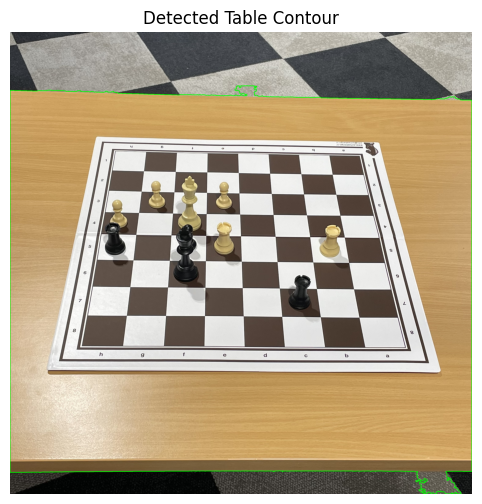

In [3]:
image = cv2.imread(image_paths[image_num])

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_brown = np.array([0, 25, 100])
upper_brown = np.array([30, 255, 255])

mask = cv2.inRange(hsv, lower_brown, upper_brown)

kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

table_contour = max(contours, key=cv2.contourArea)

contour_image = image.copy()
cv2.drawContours(contour_image, [table_contour], -1, (0, 255, 0), 3)

contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.title("Detected Table Contour")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()


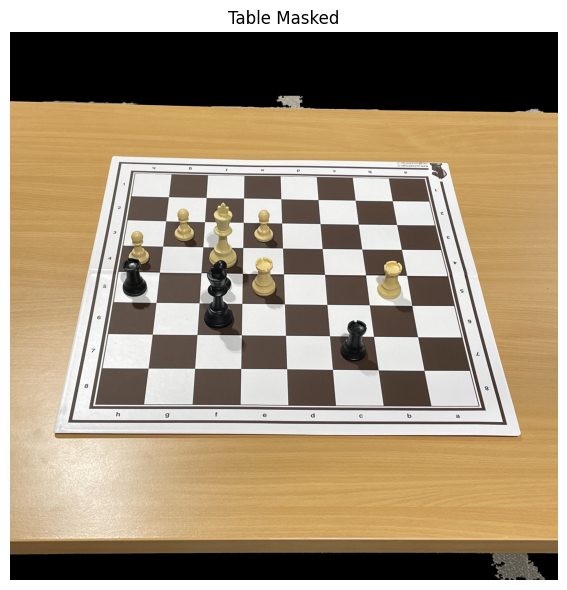

In [4]:
table_mask = np.zeros_like(image)
cv2.drawContours(table_mask, [table_contour], -1, (255, 255, 255), thickness=cv2.FILLED)
masked_image = cv2.bitwise_and(image, table_mask)

masked_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)

# Display both results side-by-side
plt.figure(figsize=(12, 6))

plt.plot(1, 2, 2)
plt.title("Table Masked")
plt.imshow(masked_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()


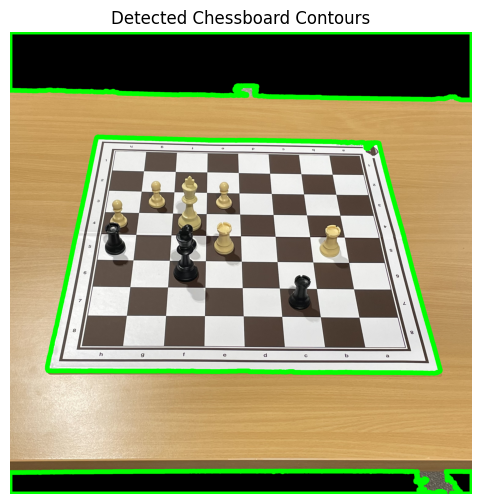

In [5]:
hsv = cv2.cvtColor(masked_image, cv2.COLOR_BGR2HSV)

lower_brown = np.array([10, 23, 50])
upper_brown = np.array([30, 255, 255])

table_color_mask = cv2.inRange(hsv, lower_brown, upper_brown)
chessboard_mask = cv2.bitwise_not(table_color_mask)

kernel = np.ones((3, 3), np.uint8)
chessboard_mask = cv2.morphologyEx(chessboard_mask, cv2.MORPH_CLOSE, kernel)
chessboard_mask = cv2.morphologyEx(chessboard_mask, cv2.MORPH_OPEN, kernel, iterations=2)

contours, _ = cv2.findContours(chessboard_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# draw contours on the original image
contour_image = masked_image.copy()
for contour in contours:
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contours")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()


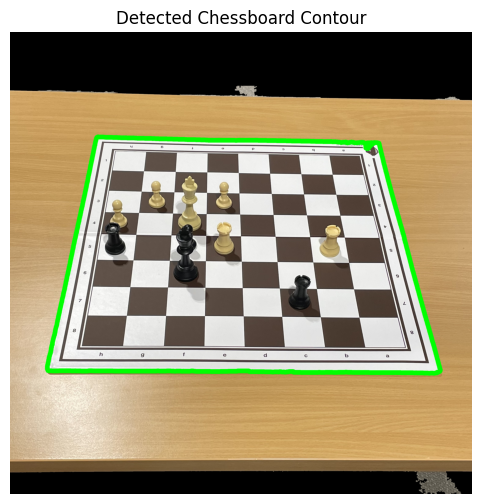

In [6]:
chessboard_countor = max(contours, key=cv2.contourArea)

# draw contours on the original image
contour_image = masked_image.copy()
cv2.drawContours(contour_image, [chessboard_countor], -1, (0, 255, 0), 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Contour")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()

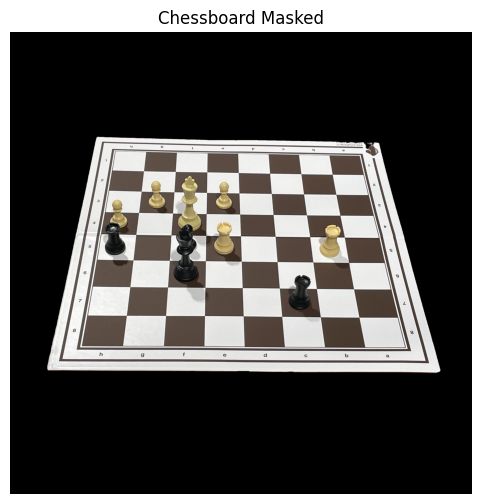

In [7]:
## aply mask to the image
chessboard_mask = np.zeros_like(image)
cv2.drawContours(chessboard_mask, [chessboard_countor], -1, (255, 255, 255), thickness=cv2.FILLED)
masked_image = cv2.bitwise_and(image, chessboard_mask)
masked_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Chessboard Masked")
plt.imshow(masked_rgb)
plt.axis('off')
plt.show()

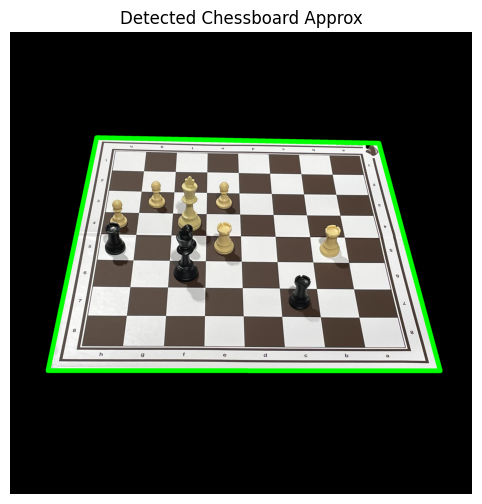

In [8]:
approx = cv2.approxPolyDP(chessboard_countor, 0.05 * cv2.arcLength(chessboard_countor, True), True)

# draw contours on the original image
contour_image = masked_image.copy()
cv2.drawContours(contour_image, [approx], -1, (0, 255, 0), 30)
contour_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Approx")
plt.imshow(contour_rgb)
plt.axis('off')
plt.show()

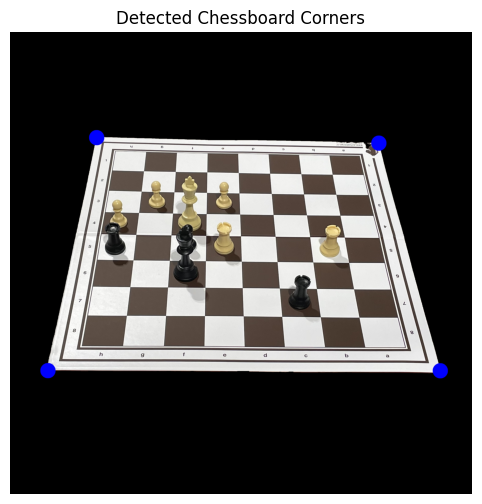

In [9]:
corners = approx.reshape(4, 2)
corners = corners[np.argsort(corners[:, 0])]


left_corners = corners[:2]

top_left = left_corners[np.argmin(left_corners[:, 1])]
bottom_left = left_corners[np.argmax(left_corners[:, 1])]

right_corners = corners[2:]
top_right = right_corners[np.argmin(right_corners[:, 1])]
bottom_right = right_corners[np.argmax(right_corners[:, 1])]


ordered_corners = [top_left, top_right, bottom_right, bottom_left]

# draw contours on the original image
corner_image = masked_image.copy()
for corner in ordered_corners:
    cv2.circle(corner_image, tuple(corner), 50, (255,0,0), -1)

corner_rgb = cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.title("Detected Chessboard Corners")
plt.imshow(corner_rgb)
plt.axis('off')
plt.show()

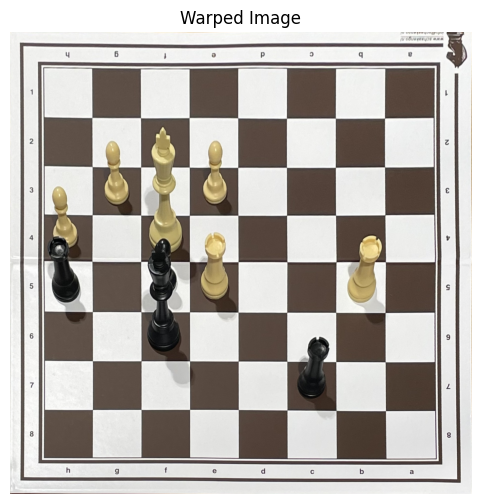

In [10]:
output_size = 3024

dst = np.array([
        [0, 0],
        [output_size - 1, 0],
        [output_size - 1, output_size - 1],
        [0, output_size - 1]
    ], dtype="float32")

M = cv2.getPerspectiveTransform(np.array(ordered_corners, dtype="float32"), dst)
warped = cv2.warpPerspective(image, M, (output_size, output_size))
warped_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.title("Warped Image")   
plt.imshow(warped_rgb)
plt.axis('off')
plt.show()

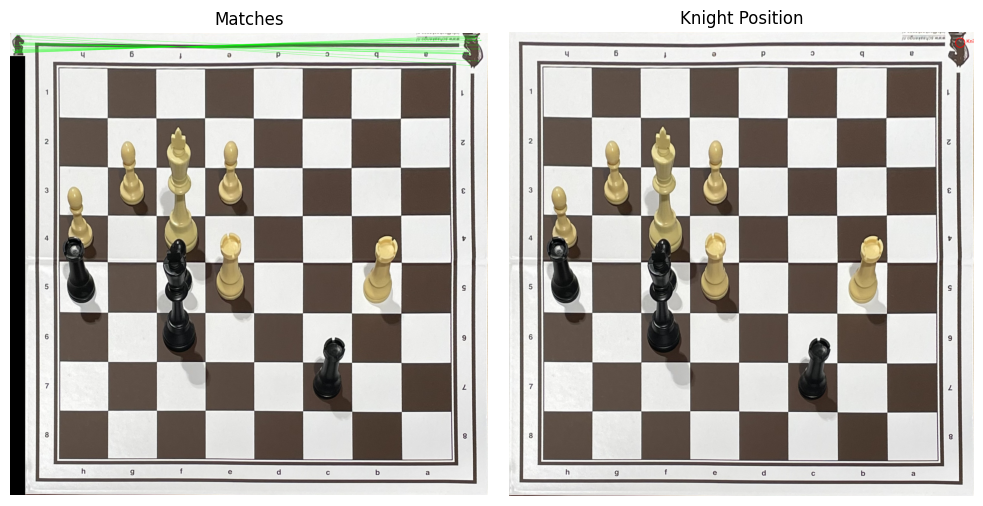

Knight found at position: (2934, 76)


In [11]:
import cv2
import numpy as np

# Load images - replace these paths with your actual images
knight_template = cv2.imread("knight2.png", cv2.IMREAD_GRAYSCALE)  # Your knight symbol

chessboard_img= cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
chessboard_color = warped.copy()

# Color versions for display
knight_template_color = cv2.imread("knight2.png")


# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors
kp1, des1 = sift.detectAndCompute(knight_template, None)
kp2, des2 = sift.detectAndCompute(chessboard_img, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Higher = more accurate but slower

flann = cv2.FlannBasedMatcher(index_params, search_params)

# Perform matching
matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test (Lowe's criteria)
good_matches = []
ratio_threshold = 0.7  # Adjust this if needed
for m, n in matches:
    if m.distance < ratio_threshold * n.distance:
        good_matches.append(m)

# Draw matches
match_output = cv2.drawMatches(
    knight_template_color, kp1, 
    chessboard_color, kp2,
    good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    matchColor=(0, 255, 0)  # Green matches
)

# Find the knight location (average of good matches)
if len(good_matches) > 0:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    
    # Calculate average position
    knight_position = np.median(dst_pts, axis=0)[0]
    
    # Draw a circle at the found position
    cv2.circle(chessboard_color, (int(knight_position[0]), int(knight_position[1])), 
               30, (0, 0, 255), 3)
    cv2.putText(chessboard_color, "Knight", 
               (int(knight_position[0]) + 40, int(knight_position[1])),
               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Matches")
match_output = cv2.cvtColor(match_output, cv2.COLOR_BGR2RGB)
plt.imshow(match_output)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Knight Position")
chessboard_color = cv2.cvtColor(chessboard_color, cv2.COLOR_BGR2RGB)
plt.imshow(chessboard_color)
plt.axis('off')
plt.tight_layout()
plt.show()

# Print position if found
if len(good_matches) > 0:
    print(f"Knight found at position: ({int(knight_position[0])}, {int(knight_position[1])})")
else:
    print("Knight not found - try adjusting the ratio threshold")

Knight position: (2934.7978515625, 76.99101257324219) | Center: (1512, 1512)
Rotating 180º to place the knight in the bottom-left corner


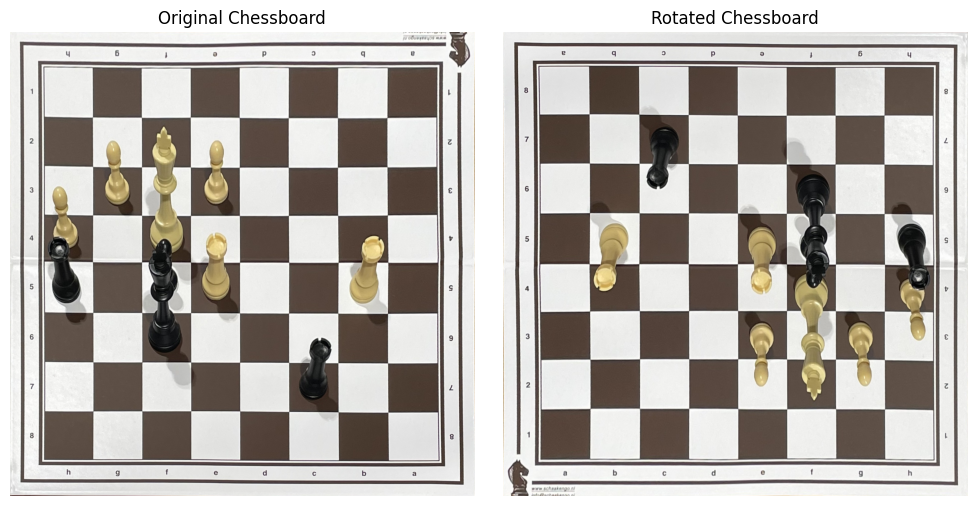

In [12]:
def rotate_knight_to_bottom_left(image, knight_pos):
    h, w = image.shape[:2]
    cx, cy = w // 2, h // 2
    
    x, y = knight_pos 

    print(f"Knight position: ({x}, {y}) | Center: ({cx}, {cy})")

    if x < cx and y < cy:
        angle = 90  
    elif x >= cx and y < cy:
        angle = 180 
    elif x >= cx and y >= cy:
        angle = 270 
    else:
        angle = 0  

    print(f"Rotating {angle}º to place the knight in the bottom-left corner")

    if angle == 90:
        rotated = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    elif angle == 180:
        rotated = cv2.rotate(image, cv2.ROTATE_180) 
    elif angle == 270:
        rotated = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE) 
    else:
        rotated = image.copy() 

    return rotated


rotated_chessboard = rotate_knight_to_bottom_left(warped, knight_position)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Chessboard")
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
plt.imshow(warped)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Rotated Chessboard")
rotated_chessboard = cv2.cvtColor(rotated_chessboard, cv2.COLOR_BGR2RGB)
plt.imshow(rotated_chessboard)
plt.axis('off')
plt.tight_layout()
plt.show()

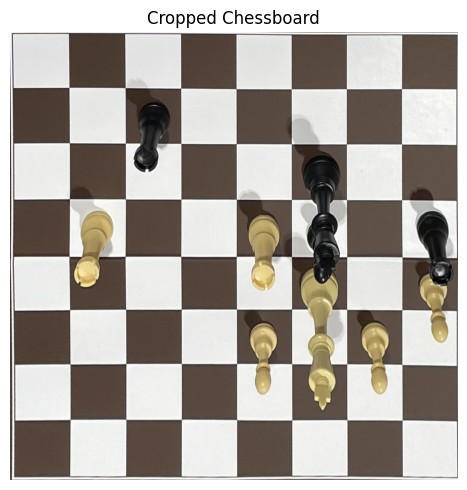

In [13]:
def crop_with_padding(image, padding=0):
    h, w = image.shape[:2]
    top = bottom = left = right = padding

    if padding > 0:
        top = bottom = left = right = padding

    cropped_image = image[top:h-bottom, left:w-right]
    return cropped_image

cropped_chessboard = crop_with_padding(rotated_chessboard, padding=220)

plt.figure(figsize=(10, 5))
plt.title("Cropped Chessboard")
plt.imshow(cropped_chessboard)
plt.axis('off')
plt.tight_layout()
plt.show()

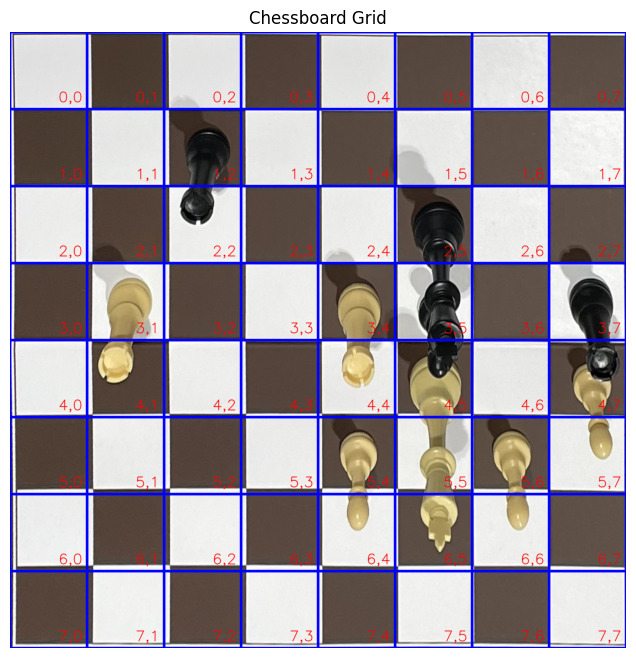

In [14]:
def draw_chess_grid(image, rows=8, cols=8):
    image_copy = image.copy()
    h, w = image.shape[:2]
    cell_height = h // rows
    cell_width = w // cols

    cell_coords = []

    for i in range(rows):
        for j in range(cols):
            x1, y1 = j * cell_width, i * cell_height
            x2, y2 = (j + 1) * cell_width, (i + 1) * cell_height

            cell_coords.append({
                "row": i,
                "col": j,
                "bbox": (x1, y1, x2, y2)
            })

            cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 0, 255), 10) 
            cv2.putText(image_copy, f"{i},{j}", (x2 - 120, y2 - 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA) 

    return image_copy, cell_coords



annotated_image, grid_info = draw_chess_grid(cropped_chessboard)

plt.figure(figsize=(8, 8))
plt.title("Chessboard Grid")
plt.imshow(annotated_image)
plt.axis('off')
plt.show()


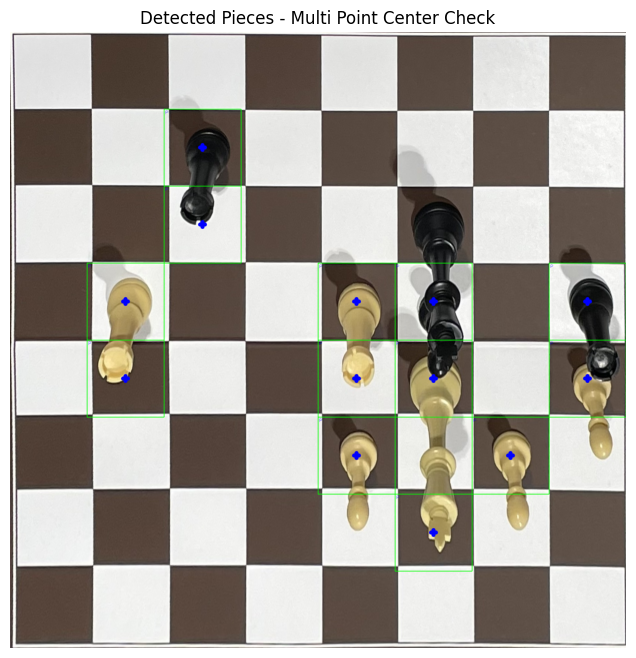

Piece found at row 1, col 2 with intensity difference 48.37765140138941
Piece found at row 2, col 2 with intensity difference 141.9109728066448
Piece found at row 3, col 1 with intensity difference 62.00964809773782
Piece found at row 3, col 4 with intensity difference 54.745988118782364
Piece found at row 3, col 5 with intensity difference 120.43084051148026
Piece found at row 3, col 7 with intensity difference 139.1795479258457
Piece found at row 4, col 1 with intensity difference 41.07614779793836
Piece found at row 4, col 4 with intensity difference 54.71262650951425
Piece found at row 4, col 5 with intensity difference 65.50209513494171
Piece found at row 4, col 7 with intensity difference 75.06939651913126
Piece found at row 5, col 4 with intensity difference 36.39521988932448
Piece found at row 5, col 6 with intensity difference 37.108323655082586
Piece found at row 6, col 5 with intensity difference 77.31470782599064


In [15]:
def detect_pieces_by_center_multi(image, grid_info, patch_size=12, threshold_diff=35, offset_y=10):
    piece_positions = []
    image_copy = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    directions = [(0, 0), (-offset_y, 0), (offset_y, 0), (0, -offset_y), (0, offset_y)]

    for cell in grid_info:
        x1, y1, x2, y2 = cell["bbox"]
        cx = (x1 + x2) // 2
        cy = (y1 + y2) // 2
        bg_intensity = np.mean(gray[y1:y2, x1:x2])

        for dy, dx in directions:
            px, py = cx + dx, cy + dy
            ps = patch_size // 2

            if py - ps < 0 or py + ps > h or px - ps < 0 or px + ps > w:
                continue

            patch = gray[py - ps:py + ps, px - ps:px + ps]
            diff = abs(np.mean(patch) - bg_intensity)

            if diff > threshold_diff:
                piece_positions.append({
                    "row": cell["row"],
                    "col": cell["col"],
                    "intensity_diff": diff
                })

                for dy2, dx2 in directions:
                    cv2.circle(image_copy, (cx + dx2, cy + dy2), 3, (0, 0, 255), 10)

                cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(image_copy, "P", (x1 + 5, y1 + 20),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)
                break

    return image_copy, piece_positions


img_with_pieces, pieces = detect_pieces_by_center_multi(cropped_chessboard, grid_info)

plt.figure(figsize=(8, 8))
plt.imshow(img_with_pieces)
plt.title("Detected Pieces - Multi Point Center Check")
plt.axis("off")
plt.show()

for piece in pieces:
    print(f"Piece found at row {piece['row']}, col {piece['col']} with intensity difference {piece['intensity_diff']}")